# Real Estate Firm - Property Sale Data

### About the Data

This is an assumed data for property sale details. The data consists of both the property and the customer details for the property enrolled by the dealing enterprise. The column contains values are described below :

* __id__ - Unique ID for the property 
* __building__ - Building number 
* __year-sale__ - Year of sale
* __month-sale__ - Month of sale 
* __property-type__ - Property Type
* __property-#__ - Propery number
* __area__ - Area in (ft.)
* __price__ - Price of property
* __status__ - Status of property - sold/not sold
* __customer-id__ - Unique ID for the customer
* __entity__ - Individual / Firm
* __name__ - Customer first name
* __surname__ - Customer last name
* __year__ - Customer year of birth
* __month__ - Customer month of birth
* __day__ - Customer day of birth
* __gender__ - Gender of customer
* __country__ - Counrty 
* __state__ - State
* __purpose__ - Purpose - Home / Investment
* __satisfaction-score__ - Customer Satisfaction score
* __mortgage__ - Apllied for mortgage - Yes / No
* __source__ - Source via which contacted the firm 

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pandas tweaks
from IPython.display import display
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None

%matplotlib inline

In [2]:
# import data 
df_sale = pd.read_csv('data.csv',delimiter=',')

In [3]:
df_sale.head()

,id,building,year-sale,month-sale,property-type,property-#,area,price,status,customer-id,entity,name,surname,year,month,day,gender,country,state,purpose,satisfaction-score,mortgage,source
0,1030,1,2005.0,11.0,Apartment,30,743.09,246172.68,Sold,C0028,Individual,Madalyn,Mercer,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,1029,1,2005.0,10.0,Apartment,29,756.21,246331.90,Sold,C0027,Individual,Lara,Carrillo,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,2002,2,2007.0,7.0,Apartment,2,587.28,209280.91,Sold,C0112,Individual,Donavan,Flowers,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,2031,2,2007.0,12.0,Apartment,31,1604.75,452667.01,Sold,C0160,Individual,Darien,Dorsey,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467083.31,Sold,C0014,Individual,Alessandra,Perry,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency


In [4]:
# check shape of dataset
df_sale.shape

(267, 23)

The data set contains 266 data points and has 23 columns.

In [5]:
# drop useless columns
drop = ['id','building','property-#','name','surname','month','day']
df_sale.drop(drop,axis = 1,  inplace=True)

In [6]:
# check value count of status
df_sale.status.value_counts()

 Sold     195
Name: status, dtype: int64

In [7]:
# we only want to perform analysis on sale data, hence we will consider only sold data
df_sold = df_sale[df_sale['status']==' Sold ']

In [8]:
df_sold

,year-sale,month-sale,property-type,area,price,status,customer-id,entity,year,gender,country,state,purpose,satisfaction-score,mortgage,source
0,2005.0,11.0,Apartment,743.09,246172.68,Sold,C0028,Individual,1986.0,F,USA,California,Home,5.0,No,Website
1,2005.0,10.0,Apartment,756.21,246331.90,Sold,C0027,Individual,1983.0,F,USA,California,Home,5.0,No,Website
2,2007.0,7.0,Apartment,587.28,209280.91,Sold,C0112,Individual,1985.0,M,USA,California,Home,1.0,Yes,Client
3,2007.0,12.0,Apartment,1604.75,452667.01,Sold,C0160,Individual,1985.0,M,USA,California,Investment,3.0,Yes,Website
4,2004.0,11.0,Apartment,1375.45,467083.31,Sold,C0014,Individual,1979.0,F,USA,California,Home,4.0,No,Agency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2005.0,7.0,Apartment,743.09,210745.17,Sold,C0174,Firm,NaN,NaN,USA,California,Investment,5.0,No,Website
192,2005.0,7.0,Apartment,1160.36,331154.88,Sold,C0174,Firm,NaN,NaN,USA,California,Investment,5.0,No,Website
193,2005.0,7.0,Apartment,625.80,204434.68,Sold,C0174,Firm,NaN,NaN,USA,California,Investment,5.0,No,Website
194,2005.0,7.0,Apartment,756.21,189194.31,Sold,C0174,Firm,NaN,NaN,USA,California,Investment,5.0,No,Website


### Q1. What is the gender distrubution when considered while buying a property ?

In [9]:
# check items in gender column
df_sold['gender'].unique()

array(['F', 'M', nan], dtype=object)

In [10]:
# after carefully analyzing the gender column we found there are null values, which are for the firms 
# who bought the propert hence no gender, therefor we replace null with Firm
df_sold['gender'].fillna('FIRM',inplace=True)
df_sold['gender'].replace('F','FEMALE',inplace=True)
df_sold['gender'].replace('M','MALE',inplace=True)

In [11]:
df_sold['gender'].value_counts()

MALE      108
FEMALE     70
FIRM       17
Name: gender, dtype: int64

In [12]:
labels = df_sold['gender'].value_counts().index.tolist()
sizes = df_sold['gender'].value_counts().values.tolist()

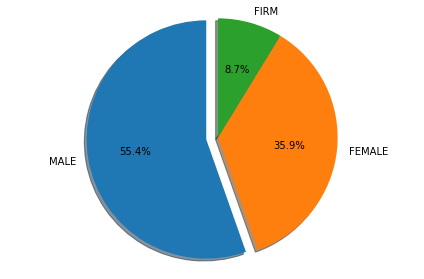

In [13]:
explode = (0.1, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### ANSWER : 
Male accounts __55.4%__ of the sale, female - __35.9%__ and FIRM - __8.7%__ ,since we cannot account the gender of FIRM, therefor we cannot proceed with gender as a point of consideration. Plus people not often buy property with their own name, wife, son it could be anyonwe.

### Q2. How are the properties distributed according to the geographical locations?

In [14]:
# check unique values
df_sold.country.unique()

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada'], dtype=object)

In [15]:
# since there are two USA, we need to rename the 'USA ' to 'USA'
df_sold['country'].replace('USA ','USA', inplace=True)

In [16]:
# check value count for countries
df_sold.country.value_counts()

USA        177
Canada       7
Russia       4
Belgium      2
UK           2
Mexico       1
Germany      1
Denmark      1
Name: country, dtype: int64

In [17]:
# since there are very few data points for all the countries, except USA, we would only consider USA.
df_sold = df_sold[df_sold['country']=="USA"]

In [18]:
# check for null values in state
df_sold.state.isna().all()

False

In [19]:
labels = df_sold['state'].value_counts().index.tolist()
sizes = df_sold['state'].value_counts().values.tolist()
for i,j in enumerate(sizes):
    sizes[i]=sizes[i]/sum(sizes) * 100

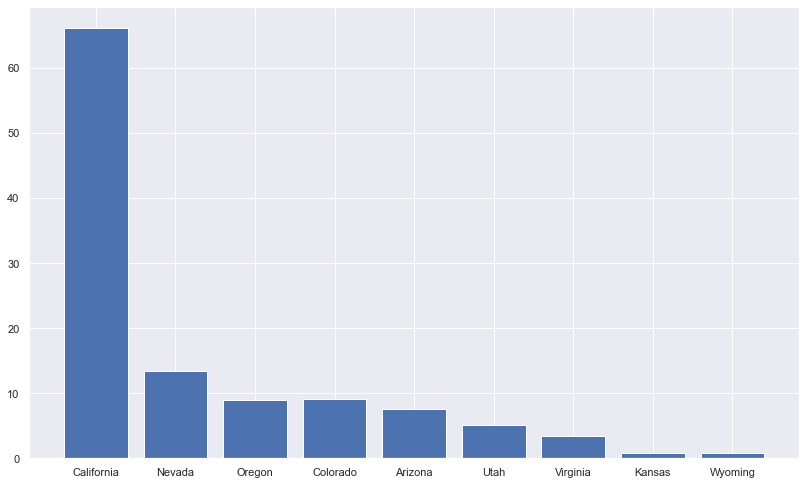

In [20]:
# now as we consider only USA we can proceed away with states.
sns.set(rc={'figure.figsize':(10.7,6.27)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,sizes)
plt.show()

In [21]:
df_sold['state'].value_counts()

California    117
Nevada         17
Oregon         11
Colorado       11
Arizona         9
Utah            6
Virginia        4
Kansas          1
Wyoming         1
Name: state, dtype: int64

### ANSWER :
California accounts most of the sale, more than 65% and consists of 117 properties. Nest comes Nevada with 17, Colorado and Oregon with 11, Arizona with 9, Utah and Virginia with 6 and 4 respectively. The lowest ones are Wyoming and Kansas with 1 property.

### Q3 Which age group are most into property buying and for what purpose ?

In [22]:
# create age column
df_sold['age'] = df_sold['year-sale'] - df_sold['year']

In [23]:
df_sold

,year-sale,month-sale,property-type,area,price,status,customer-id,entity,year,gender,country,state,purpose,satisfaction-score,mortgage,source,age
0,2005.0,11.0,Apartment,743.09,246172.68,Sold,C0028,Individual,1986.0,FEMALE,USA,California,Home,5.0,No,Website,19.0
1,2005.0,10.0,Apartment,756.21,246331.90,Sold,C0027,Individual,1983.0,FEMALE,USA,California,Home,5.0,No,Website,22.0
2,2007.0,7.0,Apartment,587.28,209280.91,Sold,C0112,Individual,1985.0,MALE,USA,California,Home,1.0,Yes,Client,22.0
3,2007.0,12.0,Apartment,1604.75,452667.01,Sold,C0160,Individual,1985.0,MALE,USA,California,Investment,3.0,Yes,Website,22.0
4,2004.0,11.0,Apartment,1375.45,467083.31,Sold,C0014,Individual,1979.0,FEMALE,USA,California,Home,4.0,No,Agency,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2005.0,7.0,Apartment,743.09,210745.17,Sold,C0174,Firm,NaN,FIRM,USA,California,Investment,5.0,No,Website,NaN
192,2005.0,7.0,Apartment,1160.36,331154.88,Sold,C0174,Firm,NaN,FIRM,USA,California,Investment,5.0,No,Website,NaN
193,2005.0,7.0,Apartment,625.80,204434.68,Sold,C0174,Firm,NaN,FIRM,USA,California,Investment,5.0,No,Website,NaN
194,2005.0,7.0,Apartment,756.21,189194.31,Sold,C0174,Firm,NaN,FIRM,USA,California,Investment,5.0,No,Website,NaN


In [24]:
# create age range 
ran = [18,25,35,45,55,65]
df_sold['age-range'] = 0
for i,age in enumerate(df_sold.age):
    if age >= ran[0] and age <= ran[1]:
        df_sold['age-range'][i] = str(ran[0])+"-"+str(ran[1])
    elif age > ran[1] and age <= ran[2]:
        df_sold['age-range'][i] = str(ran[1]+1)+"-"+str(ran[2])
    elif age > ran[2] and age <= ran[3]:
        df_sold['age-range'][i] = str(ran[2]+1)+"-"+str(ran[3])
    elif age > ran[3] and age <= ran[4]:
        df_sold['age-range'][i] = str(ran[3]+1)+"-"+str(ran[4])
    elif age > ran[4] and age <= ran[5]:
        df_sold['age-range'][i] = str(ran[4]+1)+"-"+str(ran[5])
    elif age > ran[5]:
        df_sold['age-range'][i] = str(ran[5])+"+"

In [28]:
# change age range for Firms as we dont have any age for them
df_sold['age-range'].replace(0,'FIRM',inplace=True)
df_sold['age'].fillna('FIRM',inplace=True)
df_sold['age-range'].unique()

array(['18-25', '26-35', '36-45', '46-55', '56-65', '65+', 'FIRM'],
      dtype=object)

In [38]:
purpose = df_sold.groupby('age-range')['purpose'].value_counts()
purpose_pcts = purpose.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

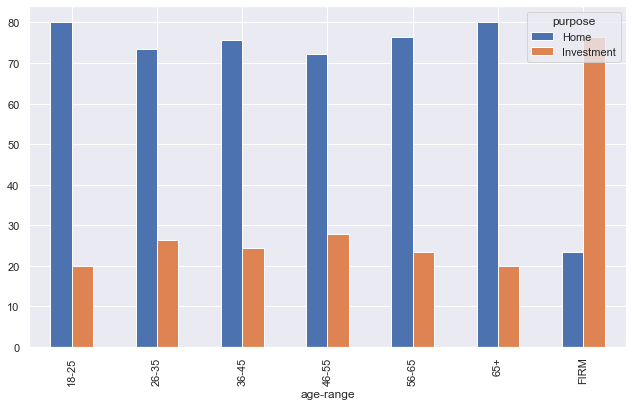

In [44]:
# plot bar plot
purpose_pcts.unstack(1).plot.bar();

### ANSWER :
From the above graph we can clearly see that FIRMs purely buy properties for investment as they should. We can see a relatively increase in investment for the age groups 36-35, 36-45 , 46-55 and 56-65. But in the case of youngsters, 18-25 and old people 65+ they buy property for housing, 80% of the time.

### Q4. Which age group of people apply for morgage the most ?

In [48]:
# check mortgage value count
df_sold['mortgage'].value_counts()

No     117
Yes     60
Name: mortgage, dtype: int64

In [49]:
mortgage = df_sold.groupby('age-range')['mortgage'].value_counts()
mortgage_pcts = mortgage.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

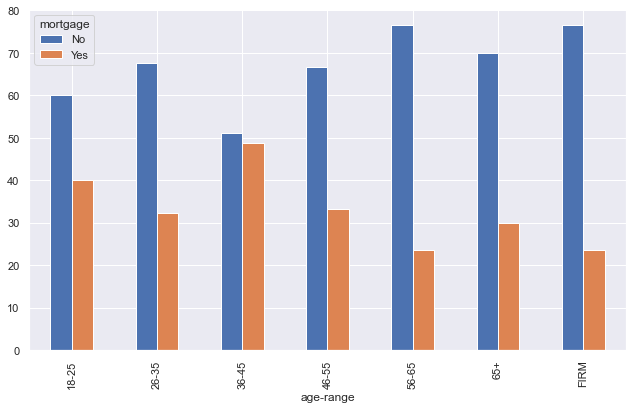

In [51]:
# plot bar plot
mortgage_pcts.unstack(1).plot.bar();

### ANSWER :
We can clearly see that people below the age group 46-55 apply for mortgage. Age group 36-45 apply mortgage almost 50% of the time, age group 18 -35 within 30-40% of the time.

### Q5. Which age group of people are reliable on what source/medium in order to buy a property the most ?

In [55]:
# check mortgage value count
df_sold['source'].value_counts()

Website    110
Agency      50
Client      17
Name: source, dtype: int64

In [56]:
source = df_sold.groupby('age-range')['source'].value_counts()
source_pcts = source.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

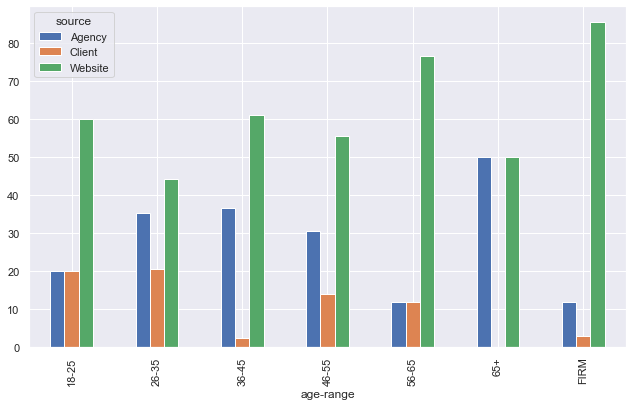

In [57]:
# plot bar plot
source_pcts.unstack(1).plot.bar();

### ASNWER :
On an average we can see that people rely on website the most and why not its 21st century. Next comes agency which people rely after website, although we can see that age group 65+ depend on agency and website similarly. Firms solely depend on website, age group 18-25 and 56-65 rely on agency and client the same.

### Q6. Is there any relation between age and the price of property people buy ?

In [62]:
# we remove the firm data, beause there is no way we can assume the age
age_price = df_sold[df_sold['age']!='FIRM']

In [66]:
# convert into proper data types
integer = ['year-sale','month-sale','year','age']
for col in integer:
    age_price[col] = age_price[col].astype(int)

In [68]:
corr = age_price.corr()

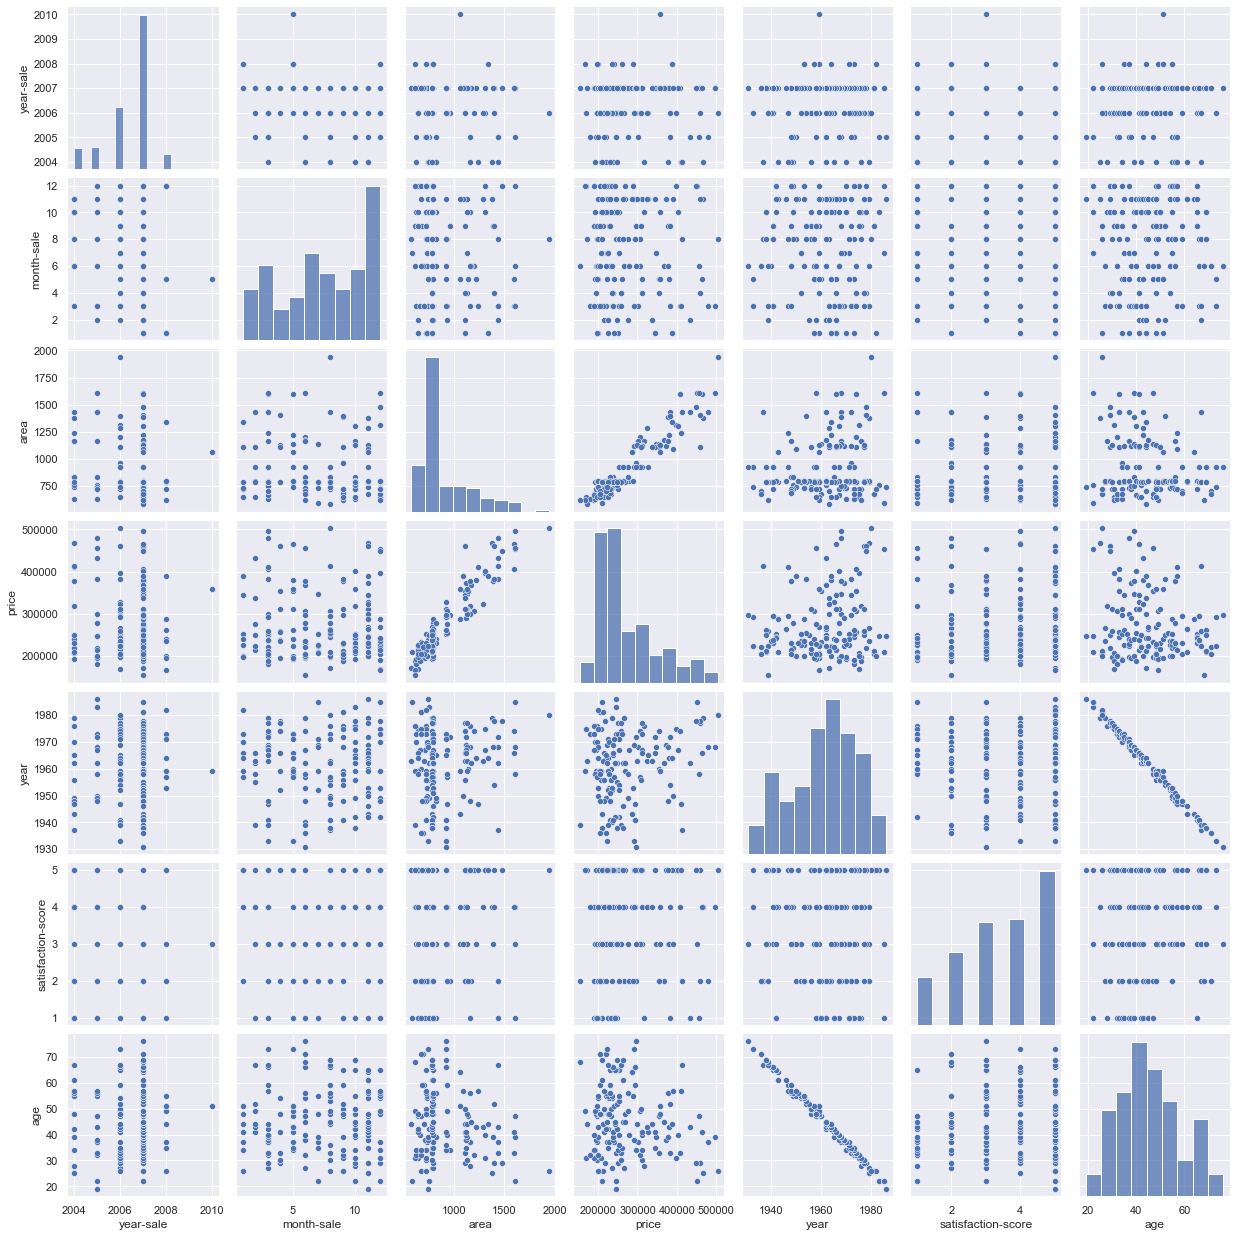

In [76]:
sns.pairplot(age_price)

In [79]:
corr_val = age_price['price'].corr(age_price['age'])
corr_val

-0.19685662444825985

### ANSWER :
From the above graph and the correlation value between age and price, we can see that there is a negative correlation of 0.19. Although this is not much but yet it slightly significant. Which means that as the age increses the price of property decreases, although not significant, still old age people tend to buy relatively low price property.